# Machine Learning Analysis on Iris Data

In [13]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Classification 

### Phase 01 - Data Exploration

In [14]:
# Load the data set
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'outcome']
iris = pd.read_csv('datasets/iris_data.csv', names=columns)

In [15]:
# feature names
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,outcome
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
# dimensions of the dataset
iris.shape

(150, 5)

In [17]:
# statistical description of the dataset
iris.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
# dataset information
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   outcome       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
# class distribution
iris.groupby('outcome').size()

outcome
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

array([[<Axes: title={'center': 'sepal-length'}>,
        <Axes: title={'center': 'sepal-width'}>],
       [<Axes: title={'center': 'petal-length'}>,
        <Axes: title={'center': 'petal-width'}>]], dtype=object)

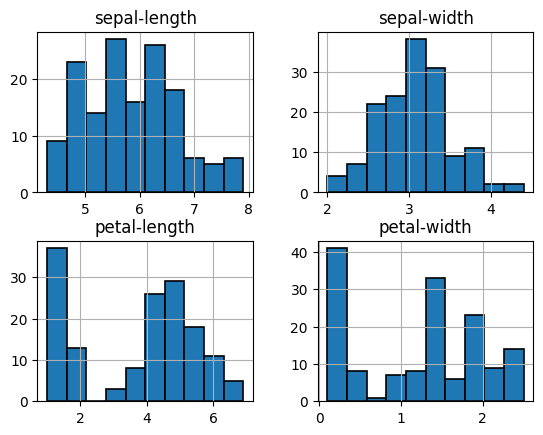

In [20]:
iris.hist(edgecolor='black', linewidth=1.2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

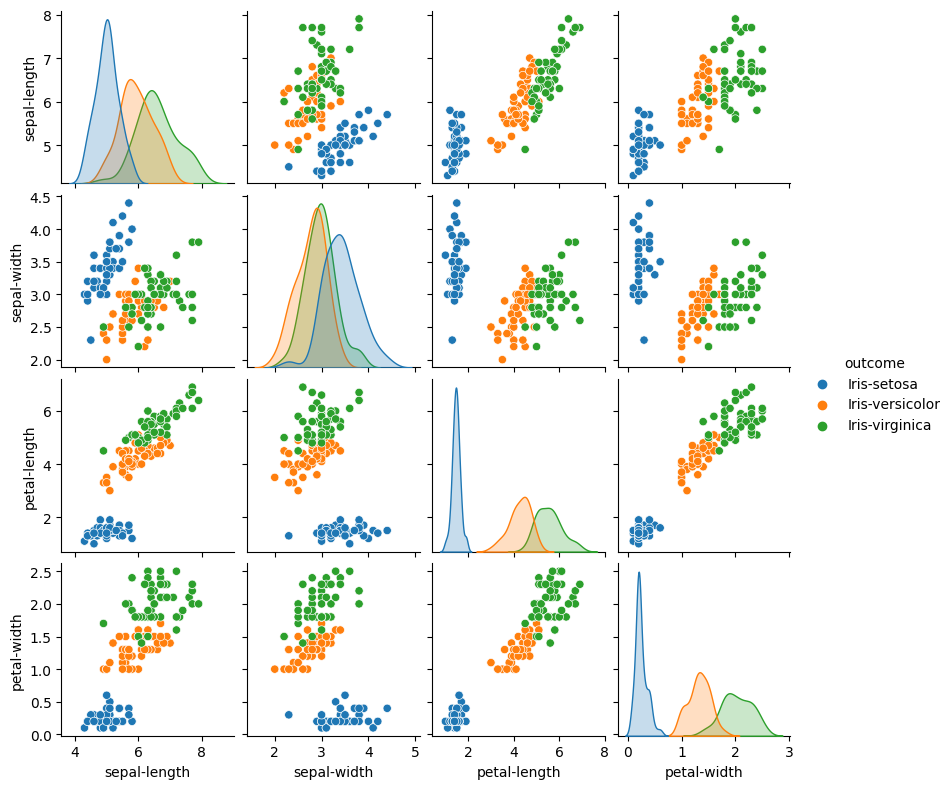

In [21]:
sns.pairplot(data=iris, hue="outcome", height=2)

In [22]:
# Plot heatmap which shows correlations
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r')
plt.show()

ValueError: could not convert string to float: 'Iris-setosa'

<Figure size 700x400 with 0 Axes>

### Phase 02 - Data Cleaning

In [23]:
# replace text outcomes classes with numerical data
cleanup_nums = {"outcome": {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica" : 2}}

iris.replace(cleanup_nums, inplace=True)
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,outcome
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Phase 03 - Feature Selection

In [24]:
# features
features = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
X = iris[features]

# responses
y = iris.outcome

### Phase 04 - Model Selection

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [26]:
# model list
models = []

models.append(("KNN", KNeighborsClassifier()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("BNB", BernoulliNB()))
models.append(("GNB", GaussianNB()))

In [28]:
strat_k_fold = StratifiedKFold(n_splits=5)

names = []
scores = []

for name, model in models:
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)
    
kf_cross_val = pd.DataFrame({'Name' : names, 'Score' : scores })
print(kf_cross_val)

  Name     Score
0  KNN  0.973333
1   DT  0.966667
2  BNB  0.333333
3  GNB  0.953333


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


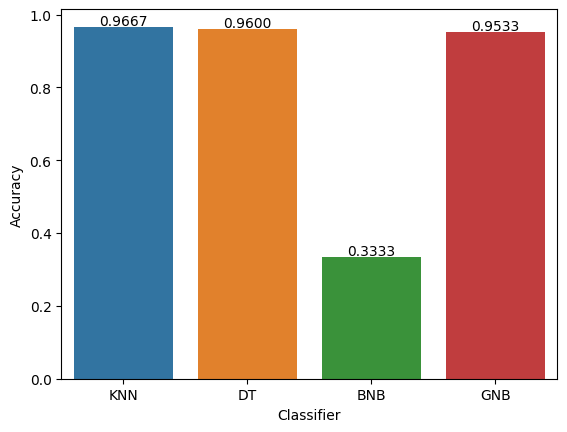

In [ ]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [31]:
# Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = iris.outcome, random_state=0)

In [46]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(random_state=17)

tree_params = {'max_depth': range(1,15),
               'max_features': range(1,7)}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

print (f"Best parameters are {tree_grid.best_params_}") 
print("tree_grid.best_score_ =",tree_grid.best_score_)
print("accuracy_score =", accuracy_score(y_test, tree_grid.predict(X_test)))



Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best parameters are {'max_depth': 4, 'max_features': 3}
tree_grid.best_score_ = 0.9557312252964426
accuracy_score = 0.9736842105263158


In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params,
                        cv=7, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

print("Best parameter is ",knn_grid.best_params_) 

print("knn_grid.best_score_ =",knn_grid.best_score_)

print("accuracy_score: ",accuracy_score(y_test, knn_grid.predict(X_test)) )

Fitting 7 folds for each of 9 candidates, totalling 63 fits
Best parameter is  {'knn__n_neighbors': 8}
knn_grid.best_score_ = 0.9464285714285714
accuracy_score:  0.9736842105263158
